In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#setups
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
from matplotlib.ticker import FuncFormatter

In [3]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [4]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [5]:
df1=pd.read_csv('data_population.csv')
print(df1)

                         COUNTRY  POPULATION
0                        Belgium  11.554.767
1                       Bulgaria   6.916.548
2                        Czechia  10.494.836
3                        Denmark   5.840.045
4   Germany including former GDR  83.155.031
5                        Estonia   1.330.068
6                        Ireland   5.006.324
7                         Greece  10.678.632
8                          Spain  47.398.695
9                         France  67.656.682
10                       Croatia   4.036.355
11                         Italy  59.236.213
12                        Cyprus     896.007
13                        Latvia   1.893.223
14                     Lithuania   2.795.680
15                    Luxembourg     634.730
16                       Hungary   9.730.772
17                         Malta     516.100
18                   Netherlands  17.475.415
19                       Austria   8.932.664
20                        Poland  37.840.001
21        

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COUNTRY     27 non-null     object
 1   POPULATION  27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


In [7]:
country = df1.iloc[0:1]

In [8]:
country = country.T.reset_index()
country.head()

,index,0
0,COUNTRY,Belgium
1,POPULATION,11.554.767


In [9]:
country.columns=country.iloc[0]
country = country.iloc[0:]
country=country.rename(columns={'Status': 'Country'})

In [10]:
country.head()

,COUNTRY,Belgium
0,COUNTRY,Belgium
1,POPULATION,11.554.767


In [11]:
population=df1[df1=='population']
population=df1.iloc[0:1]
population=population.T.reset_index()
population.columns=population.iloc[0]
population=population.iloc[0:]
population=population.rename(columns={'Status': 'population'})
population.head()

,COUNTRY,Belgium
0,COUNTRY,Belgium
1,POPULATION,11.554.767


In [12]:
df1.head(5)

,COUNTRY,POPULATION
0,Belgium,11.554.767
1,Bulgaria,6.916.548
2,Czechia,10.494.836
3,Denmark,5.840.045
4,Germany including former GDR,83.155.031


In [13]:
df1.dtypes

COUNTRY       object
POPULATION    object
dtype: object

In [14]:
df1['POPULATION'] = df1['POPULATION'].str.replace('.','').astype(int)

C:\Users\kambo\AppData\Local\Temp\ipykernel_8472\3978880961.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['POPULATION'] = df1['POPULATION'].str.replace('.','').astype(int)


In [15]:
df1['POPULATION']

0     11554767
1      6916548
2     10494836
3      5840045
4     83155031
5      1330068
6      5006324
7     10678632
8     47398695
9     67656682
10     4036355
11    59236213
12      896007
13     1893223
14     2795680
15      634730
16     9730772
17      516100
18    17475415
19     8932664
20    37840001
21    10298252
22    19201662
23     2108977
24     5459781
25     5533793
26    10379295
Name: POPULATION, dtype: int32

In [16]:
df1.dtypes

COUNTRY       object
POPULATION     int32
dtype: object

In [17]:
", ".join(df1[(df1['POPULATION']>9000000) & (df1['POPULATION']<11000000)]['COUNTRY'].to_list())

'Czechia, Greece, Hungary, Portugal, Sweden'

In [18]:
results = []
for i, item in df1.iterrows():
    if item['POPULATION']>9000000 and item['POPULATION']<11000000:
        results.append(item['COUNTRY'])
", ".join(results)

'Czechia, Greece, Hungary, Portugal, Sweden'

In [19]:
import pandas as pd
df2=pd.read_csv('marriage_greece.csv')
print(df2)

    Έτος  Απόλυτοι Αριθμοί  Επί 1000 κατοίκων
0   2010              56.3                5.0
1   2011              55.1                5.0
2   2012              49.7                4.5
3   2013              51.3                4.6
4   2014              53.1                4.9
5   2015              53.7                4.9
6   2016              49.6                4.6
7   2017              50.1                4.7
8   2018              47.4                4.4
9   2019              47.1                4.4
10  2020              31.5                2.9


In [20]:
df2.dtypes

Έτος                   int64
Απόλυτοι Αριθμοί     float64
Επί 1000 κατοίκων    float64
dtype: object

In [21]:
df2['Απόλυτοι Αριθμοί']= df2['Απόλυτοι Αριθμοί'].astype(str).str.replace(".","").astype(int)

C:\Users\kambo\AppData\Local\Temp\ipykernel_8472\667256469.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Απόλυτοι Αριθμοί']= df2['Απόλυτοι Αριθμοί'].astype(str).str.replace(".","").astype(int)


In [22]:
df2['Απόλυτοι Αριθμοί']

0     56338
1     55099
2     49705
3     51256
4     53105
5     53672
6     49632
7     50138
8     47428
9     47137
10    31475
Name: Απόλυτοι Αριθμοί, dtype: int32

In [23]:
df2.head()

,Έτος,Απόλυτοι Αριθμοί,Επί 1000 κατοίκων
0,2010,56338,5.0
1,2011,55099,5.0
2,2012,49705,4.5
3,2013,51256,4.6
4,2014,53105,4.9


In [24]:
df3=pd.read_csv('marriage_euro.csv')
print(df3)

   YEAR  Czech Republic  Hungary  Portugal  Sweeden
0  2011             4.3      3.6       3.8      5.0
1  2012             4.3      3.6       3.4      5.3
2  2013             4.1      3.7       3.3      5.4
3  2014             4.3      3.9       3.1      5.5
4  2015             4.6      4.7       3.0      5.3
5  2016             4.8      5.3       3.1      5.4
6  2017             5.0      5.2       3.3      5.2
7  2018             5.1      5.2       3.4      5.0
8  2019             5.1      6.7       3.2      4.7
9  2020             4.2      6.9       1.8      3.6


In [25]:
df3.dtypes

YEAR                int64
Czech Republic    float64
Hungary           float64
Portugal          float64
Sweeden           float64
dtype: object

In [26]:
df4=pd.read_csv('population_euro.csv')
print(df4)

   YEAR  Czech Republic  Hungary  Portugal   Sweeden
0  2011        10487631  9985722  10572721   9415570
1  2012        10505445  9931925  10542398   9482855
2  2013        10516126  9908798  10487289   9555893
3  2014        10512519  9877365  10427301   9644864
4  2015        10538275  9855571  10374822   9747335
5  2016        10553843  9830485  10341330   9851017
6  2017        10578820  9797561  10309573   9995153
7  2018        10610055  9778371  10291027  10120242
8  2019        10649800  9778371  10276617  10230185
9  2020        10693939  9769562  10295909  10327589


In [27]:
df4.dtypes

YEAR              int64
Czech Republic    int64
Hungary           int64
Portugal          int64
Sweeden           int64
dtype: object

In [28]:
df_marriage=pd.merge(df3,df4,on='YEAR')
df_marriage

,YEAR,Czech Republic_x,Hungary_x,Portugal_x,Sweeden_x,Czech Republic_y,Hungary_y,Portugal_y,Sweeden_y
0,2011,4.3,3.6,3.8,5.0,10487631,9985722,10572721,9415570
1,2012,4.3,3.6,3.4,5.3,10505445,9931925,10542398,9482855
2,2013,4.1,3.7,3.3,5.4,10516126,9908798,10487289,9555893
3,2014,4.3,3.9,3.1,5.5,10512519,9877365,10427301,9644864
4,2015,4.6,4.7,3.0,5.3,10538275,9855571,10374822,9747335
5,2016,4.8,5.3,3.1,5.4,10553843,9830485,10341330,9851017
6,2017,5.0,5.2,3.3,5.2,10578820,9797561,10309573,9995153
7,2018,5.1,5.2,3.4,5.0,10610055,9778371,10291027,10120242
8,2019,5.1,6.7,3.2,4.7,10649800,9778371,10276617,10230185
9,2020,4.2,6.9,1.8,3.6,10693939,9769562,10295909,10327589


In [29]:
df_marriage=pd.merge(df4,df3,on='YEAR')
df_marriage=pd.concat([df4,df3], axis=1)
df_marriage

,YEAR,Czech Republic,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,10487631,9985722,10572721,9415570,2011,4.3,3.6,3.8,5.0
1,2012,10505445,9931925,10542398,9482855,2012,4.3,3.6,3.4,5.3
2,2013,10516126,9908798,10487289,9555893,2013,4.1,3.7,3.3,5.4
3,2014,10512519,9877365,10427301,9644864,2014,4.3,3.9,3.1,5.5
4,2015,10538275,9855571,10374822,9747335,2015,4.6,4.7,3.0,5.3
5,2016,10553843,9830485,10341330,9851017,2016,4.8,5.3,3.1,5.4
6,2017,10578820,9797561,10309573,9995153,2017,5.0,5.2,3.3,5.2
7,2018,10610055,9778371,10291027,10120242,2018,5.1,5.2,3.4,5.0
8,2019,10649800,9778371,10276617,10230185,2019,5.1,6.7,3.2,4.7
9,2020,10693939,9769562,10295909,10327589,2020,4.2,6.9,1.8,3.6


In [30]:
df_marriage.head(1)

,YEAR,Czech Republic,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,10487631,9985722,10572721,9415570,2011,4.3,3.6,3.8,5.0


In [32]:
df6 = df4['Czech Republic']*df3['Czech Republic']/1000
print (df6)

0   45096.8
1   45173.4
2   43116.1
3   45203.8
4   48476.1
5   50658.4
6   52894.1
7   54111.3
8   54314.0
9   44914.5
Name: Czech Republic, dtype: float64


In [33]:
df7 = df4['Hungary']*df3['Hungary']/1000
print (df7)
    

0   35948.6
1   35754.9
2   36662.6
3   38521.7
4   46321.2
5   52101.6
6   50947.3
7   50847.5
8   65515.1
9   67410.0
Name: Hungary, dtype: float64


In [34]:
df8= df4['Portugal']*df3['Portugal']/1000
print (df8)

0   40176.3
1   35844.2
2   34608.1
3   32324.6
4   31124.5
5   32058.1
6   34021.6
7   34989.5
8   32885.2
9   18532.6
Name: Portugal, dtype: float64


In [35]:
df9= df4['Sweeden']*df3['Sweeden']/1000
print (df9)
    

0   47077.8
1   50259.1
2   51601.8
3   53046.8
4   51660.9
5   53195.5
6   51974.8
7   50601.2
8   48081.9
9   37179.3
Name: Sweeden, dtype: float64


In [36]:
df_all=pd.concat([df6,df7,df8,df9], axis=1)
df_all         

,Czech Republic,Hungary,Portugal,Sweeden
0,45096.8,35948.6,40176.3,47077.8
1,45173.4,35754.9,35844.2,50259.1
2,43116.1,36662.6,34608.1,51601.8
3,45203.8,38521.7,32324.6,53046.8
4,48476.1,46321.2,31124.5,51660.9
5,50658.4,52101.6,32058.1,53195.5
6,52894.1,50947.3,34021.6,51974.8
7,54111.3,50847.5,34989.5,50601.2
8,54314.0,65515.1,32885.2,48081.9
9,44914.5,67410.0,18532.6,37179.3


In [37]:
df_all=df_all.astype(int).replace('.',',')
df_all

,Czech Republic,Hungary,Portugal,Sweeden
0,45096,35948,40176,47077
1,45173,35754,35844,50259
2,43116,36662,34608,51601
3,45203,38521,32324,53046
4,48476,46321,31124,51660
5,50658,52101,32058,53195
6,52894,50947,34021,51974
7,54111,50847,34989,50601
8,54313,65515,32885,48081
9,44914,67409,18532,37179


In [38]:
df_total=pd.concat([df_marriage,df_all], axis=1)
df_total

,YEAR,Czech Republic,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Hungary,Portugal,Sweeden,Czech Republic,Hungary,Portugal,Sweeden
0,2011,10487631,9985722,10572721,9415570,2011,4.3,3.6,3.8,5.0,45096,35948,40176,47077
1,2012,10505445,9931925,10542398,9482855,2012,4.3,3.6,3.4,5.3,45173,35754,35844,50259
2,2013,10516126,9908798,10487289,9555893,2013,4.1,3.7,3.3,5.4,43116,36662,34608,51601
3,2014,10512519,9877365,10427301,9644864,2014,4.3,3.9,3.1,5.5,45203,38521,32324,53046
4,2015,10538275,9855571,10374822,9747335,2015,4.6,4.7,3.0,5.3,48476,46321,31124,51660
5,2016,10553843,9830485,10341330,9851017,2016,4.8,5.3,3.1,5.4,50658,52101,32058,53195
6,2017,10578820,9797561,10309573,9995153,2017,5.0,5.2,3.3,5.2,52894,50947,34021,51974
7,2018,10610055,9778371,10291027,10120242,2018,5.1,5.2,3.4,5.0,54111,50847,34989,50601
8,2019,10649800,9778371,10276617,10230185,2019,5.1,6.7,3.2,4.7,54313,65515,32885,48081
9,2020,10693939,9769562,10295909,10327589,2020,4.2,6.9,1.8,3.6,44914,67409,18532,37179


In [39]:
df_all_marriage=pd.concat([df3['YEAR'],df_all], axis=1)
df_all_marriage

,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,45096,35948,40176,47077
1,2012,45173,35754,35844,50259
2,2013,43116,36662,34608,51601
3,2014,45203,38521,32324,53046
4,2015,48476,46321,31124,51660
5,2016,50658,52101,32058,53195
6,2017,52894,50947,34021,51974
7,2018,54111,50847,34989,50601
8,2019,54313,65515,32885,48081
9,2020,44914,67409,18532,37179


In [40]:
df_marriage

,YEAR,Czech Republic,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,10487631,9985722,10572721,9415570,2011,4.3,3.6,3.8,5.0
1,2012,10505445,9931925,10542398,9482855,2012,4.3,3.6,3.4,5.3
2,2013,10516126,9908798,10487289,9555893,2013,4.1,3.7,3.3,5.4
3,2014,10512519,9877365,10427301,9644864,2014,4.3,3.9,3.1,5.5
4,2015,10538275,9855571,10374822,9747335,2015,4.6,4.7,3.0,5.3
5,2016,10553843,9830485,10341330,9851017,2016,4.8,5.3,3.1,5.4
6,2017,10578820,9797561,10309573,9995153,2017,5.0,5.2,3.3,5.2
7,2018,10610055,9778371,10291027,10120242,2018,5.1,5.2,3.4,5.0
8,2019,10649800,9778371,10276617,10230185,2019,5.1,6.7,3.2,4.7
9,2020,10693939,9769562,10295909,10327589,2020,4.2,6.9,1.8,3.6


In [41]:
df2

,Έτος,Απόλυτοι Αριθμοί,Επί 1000 κατοίκων
0,2010,56338,5.0
1,2011,55099,5.0
2,2012,49705,4.5
3,2013,51256,4.6
4,2014,53105,4.9
5,2015,53672,4.9
6,2016,49632,4.6
7,2017,50138,4.7
8,2018,47428,4.4
9,2019,47137,4.4


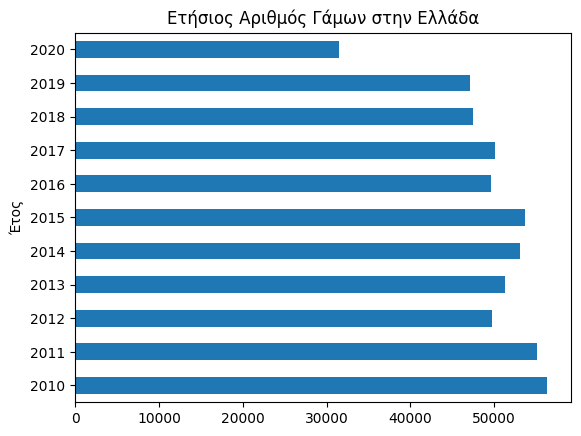

In [56]:
ax=df2.plot(kind='barh',x='Έτος',y='Απόλυτοι Αριθμοί', legend=False)
ax.set_title('Ετήσιος Αριθμός Γάμων στην Ελλάδα')

plt.show()

In [57]:
df_all_marriage

,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,45096,35948,40176,47077
1,2012,45173,35754,35844,50259
2,2013,43116,36662,34608,51601
3,2014,45203,38521,32324,53046
4,2015,48476,46321,31124,51660
5,2016,50658,52101,32058,53195
6,2017,52894,50947,34021,51974
7,2018,54111,50847,34989,50601
8,2019,54313,65515,32885,48081
9,2020,44914,67409,18532,37179


Text(0.5, 1.0, 'Γάμοι Ευρώπη ανά Έτος')

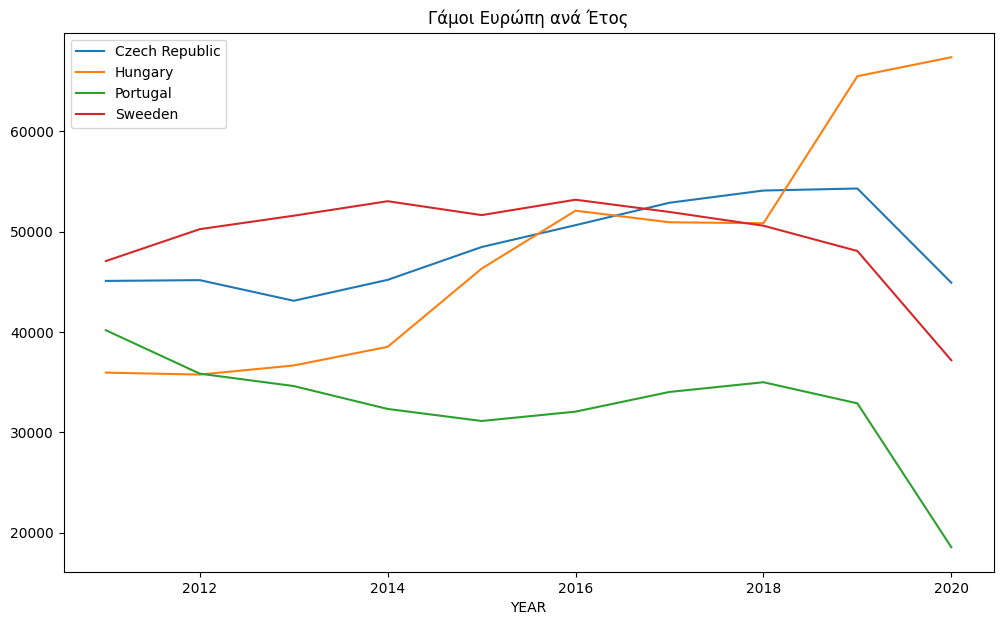

In [58]:
ax=df_all_marriage.plot(kind='line',x='YEAR',figsize=(12,7), legend=True)
ax.set_title('Γάμοι Ευρώπη ανά Έτος')

In [59]:
df5=pd.read_csv('συμφωνο_συμβιωσης.csv')
print(df5)

   Έτος  ΣΥΜΦΩΝΑ ΣΥΜΒΙΩΣΗΣ
0  2011                185
1  2012                314
2  2013                581
3  2014               1573
4  2015               2611
5  2016               3799
6  2017               4921
7  2018               6369
8  2019               7924
9  2020               8986


In [60]:
df_greece=pd.concat([df5, df2['Απόλυτοι Αριθμοί']],axis=1)
df_greece

,Έτος,ΣΥΜΦΩΝΑ ΣΥΜΒΙΩΣΗΣ,Απόλυτοι Αριθμοί
0,2011.0,185.0,56338
1,2012.0,314.0,55099
2,2013.0,581.0,49705
3,2014.0,1573.0,51256
4,2015.0,2611.0,53105
5,2016.0,3799.0,53672
6,2017.0,4921.0,49632
7,2018.0,6369.0,50138
8,2019.0,7924.0,47428
9,2020.0,8986.0,47137


In [61]:
df_greece=df_greece.dropna()

In [62]:
df_greece=df_greece.astype(int).replace('.',',')
df_greece

,Έτος,ΣΥΜΦΩΝΑ ΣΥΜΒΙΩΣΗΣ,Απόλυτοι Αριθμοί
0,2011,185,56338
1,2012,314,55099
2,2013,581,49705
3,2014,1573,51256
4,2015,2611,53105
5,2016,3799,53672
6,2017,4921,49632
7,2018,6369,50138
8,2019,7924,47428
9,2020,8986,47137


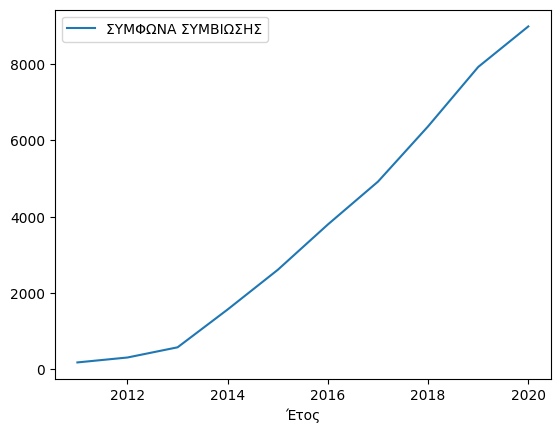

In [63]:
ax=df_greece.plot(kind='line',x='Έτος',y='ΣΥΜΦΩΝΑ ΣΥΜΒΙΩΣΗΣ')

In [67]:
df_men_age=pd.read_csv('mean_age_male.csv')
df_men_age

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,31.0,32.7,31.6,30.1,35.5
1,2014,31.4,33.0,32.1,31.5,35.8
2,2015,31.6,33.2,32.0,31.9,36.2
3,2016,31.7,33.2,32.1,32.2,36.5
4,2017,31.8,33.3,32.3,32.5,36.6
5,2018,31.9,33.4,32.4,32.9,36.7
6,2019,32.0,33.7,32.4,33.2,36.7
7,2020,32.4,33.8,32.4,34.0,37.5


In [68]:
df_female_age=pd.read_csv('mean_age_woman.csv')
df_female_age

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,28.1,29.4,28.6,28.0,33.0
1,2014,28.7,29.9,29.3,29.8,33.3
2,2015,28.8,30.1,29.2,30.2,33.6
3,2016,29.0,30.1,29.2,30.4,33.8
4,2017,29.1,30.3,29.4,30.7,33.8
5,2018,29.2,30.3,29.6,31.1,34.0
6,2019,29.4,30.7,29.6,31.5,34.1
7,2020,29.7,30.7,29.5,32.3,34.8


In [69]:
df_ages=pd.concat([df_men_age,df_female_age], axis=1)
df_ages

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,31.0,32.7,31.6,30.1,35.5,2011,28.1,29.4,28.6,28.0,33.0
1,2014,31.4,33.0,32.1,31.5,35.8,2014,28.7,29.9,29.3,29.8,33.3
2,2015,31.6,33.2,32.0,31.9,36.2,2015,28.8,30.1,29.2,30.2,33.6
3,2016,31.7,33.2,32.1,32.2,36.5,2016,29.0,30.1,29.2,30.4,33.8
4,2017,31.8,33.3,32.3,32.5,36.6,2017,29.1,30.3,29.4,30.7,33.8
5,2018,31.9,33.4,32.4,32.9,36.7,2018,29.2,30.3,29.6,31.1,34.0
6,2019,32.0,33.7,32.4,33.2,36.7,2019,29.4,30.7,29.6,31.5,34.1
7,2020,32.4,33.8,32.4,34.0,37.5,2020,29.7,30.7,29.5,32.3,34.8


Text(0.5, 1.0, 'MEAN AGE OF MEN WHO MARRY')

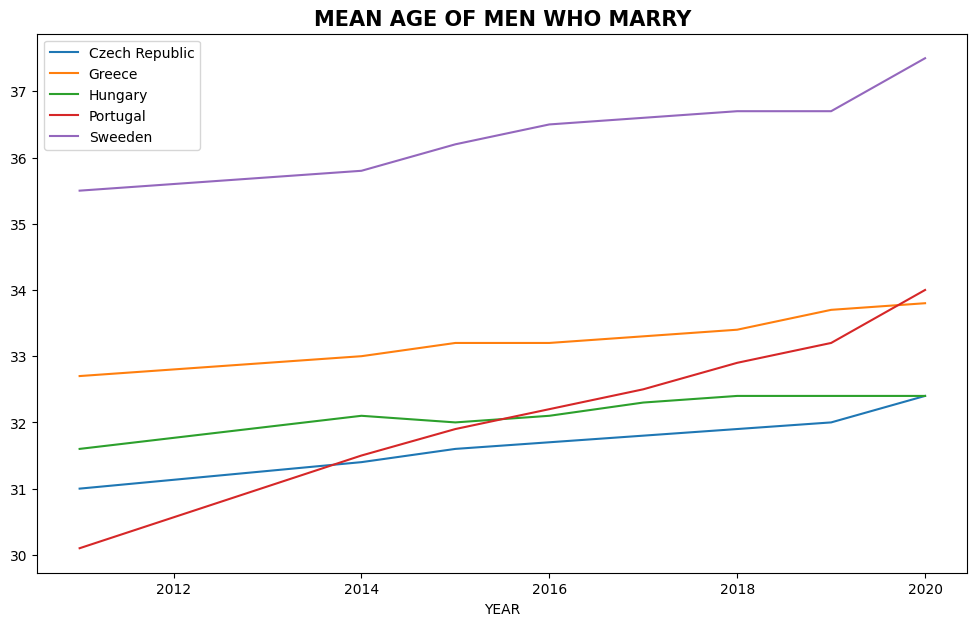

In [78]:
ax=df_men_age.plot(kind='line',x='YEAR', figsize=(12,7))
ax.set_title('MEAN AGE OF MEN WHO MARRY', fontsize=15, fontweight='bold')

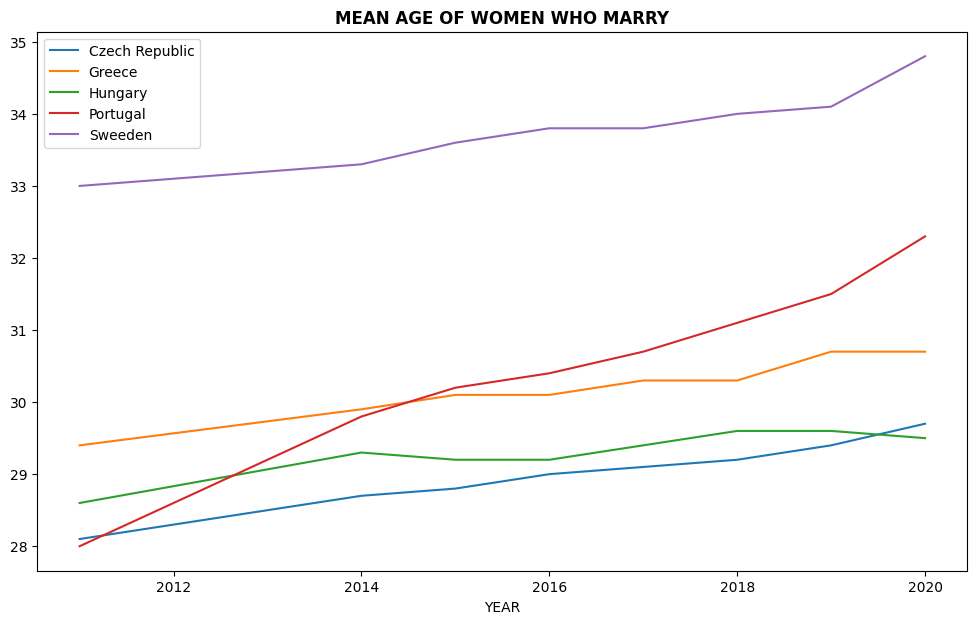

In [79]:
ax=df_female_age.plot(kind='line',x='YEAR', figsize=(12,7))
ax.set_title('MEAN AGE OF WOMEN WHO MARRY', fontsize=12, fontweight='bold')

plt.show()

In [86]:
df_divorces=pd.read_csv('europe_divorce.csv')
df_divorces

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,28113,12705,23335,26750,23389
1,2012,26402,14880,21830,25380,23422
2,2013,27895,16717,20209,22525,26933
3,2014,26761,14427,19576,21988,26143
4,2015,26083,15600,20315,23377,24876
5,2016,24996,11013,19552,22340,24258
6,2017,25775,19190,18495,21577,24210


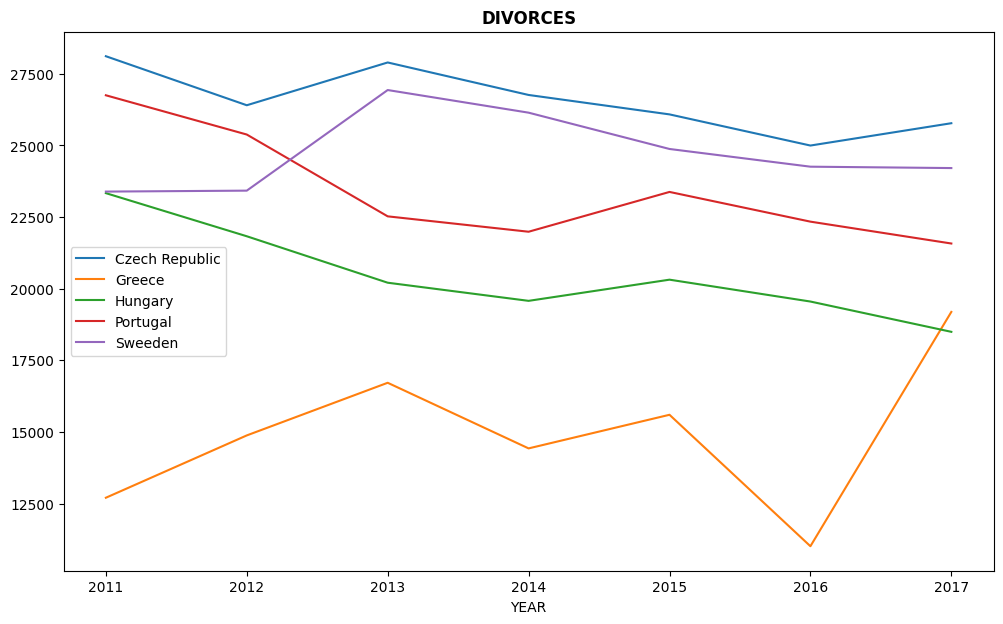

In [87]:
ax=df_divorces.plot(kind='line',x='YEAR', figsize=(12,7))
ax.set_title('DIVORCES', fontsize=12, fontweight='bold')
plt.show()

In [82]:
df_final_greece=pd.merge(df2,df5, on='Έτος')
df_final_greece

,Έτος,Απόλυτοι Αριθμοί,Επί 1000 κατοίκων,ΣΥΜΦΩΝΑ ΣΥΜΒΙΩΣΗΣ
0,2011,55099,5.0,185
1,2012,49705,4.5,314
2,2013,51256,4.6,581
3,2014,53105,4.9,1573
4,2015,53672,4.9,2611
5,2016,49632,4.6,3799
6,2017,50138,4.7,4921
7,2018,47428,4.4,6369
8,2019,47137,4.4,7924
9,2020,31475,2.9,8986


In [83]:
df_all_marriage

,YEAR,Czech Republic,Hungary,Portugal,Sweeden
0,2011,45096,35948,40176,47077
1,2012,45173,35754,35844,50259
2,2013,43116,36662,34608,51601
3,2014,45203,38521,32324,53046
4,2015,48476,46321,31124,51660
5,2016,50658,52101,32058,53195
6,2017,52894,50947,34021,51974
7,2018,54111,50847,34989,50601
8,2019,54313,65515,32885,48081
9,2020,44914,67409,18532,37179


In [84]:
df_ages

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,31.0,32.7,31.6,30.1,35.5,2011,28.1,29.4,28.6,28.0,33.0
1,2014,31.4,33.0,32.1,31.5,35.8,2014,28.7,29.9,29.3,29.8,33.3
2,2015,31.6,33.2,32.0,31.9,36.2,2015,28.8,30.1,29.2,30.2,33.6
3,2016,31.7,33.2,32.1,32.2,36.5,2016,29.0,30.1,29.2,30.4,33.8
4,2017,31.8,33.3,32.3,32.5,36.6,2017,29.1,30.3,29.4,30.7,33.8
5,2018,31.9,33.4,32.4,32.9,36.7,2018,29.2,30.3,29.6,31.1,34.0
6,2019,32.0,33.7,32.4,33.2,36.7,2019,29.4,30.7,29.6,31.5,34.1
7,2020,32.4,33.8,32.4,34.0,37.5,2020,29.7,30.7,29.5,32.3,34.8


In [85]:
df_divorces

,YEAR,Czech Republic,Greece,Hungary,Portugal,Sweeden
0,2011,28113,12705,23335,26750,23389
1,2012,26402,14880,21830,25380,23422
2,2013,27895,16717,20209,22525,26933
3,2014,26761,14427,19576,21988,26143
4,2015,26083,15600,20315,23377,24876
5,2016,24996,11013,19552,22340,24258
6,2017,25775,19190,18495,21577,24210
